In [2]:
from particles import Particles as par
from moments import Moments

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# This is the data in the x direction

## The columns are the time steps. Each row represents a particle and its position at each time step

### The media has a length of 100 mm, start_time = 0, step = 10, end_time = 15000. time is in minutes

In [5]:
part = par('./data/position_data_a.txt', dimension=1,time_end=15000,time_step=10)
part.qx.head()
# particle_distribution_df = part.particle_distribution(90,part.time,part.qx)

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,0,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
1,0,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
2,0,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
3,0,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100
4,0,0,0,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,100


### shape of the dataframe

In [6]:
part.qx.shape

(10000, 1501)

# cumulative distribution of particles

At slice L=  0
At slice L=  20
At slice L=  40
At slice L=  60
At slice L=  80
At slice L=  100


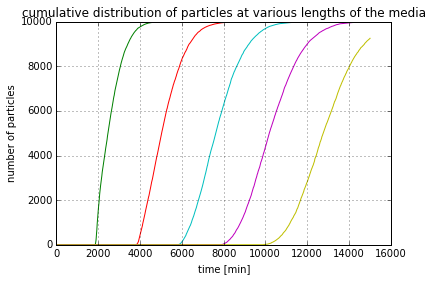

In [7]:
for l in range(0, 120, 20):
    print('At slice L= ',l)
    plt.plot(range(0,15010,10),part.particle_distribution(l,part.time,part.qx).cumulative)
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
plt.title('cumulative distribution of particles at various lengths of the media')

# discrete distribution of particles

At slice L=  0
At slice L=  20
At slice L=  40
At slice L=  60
At slice L=  80
At slice L=  100


(0, 200)

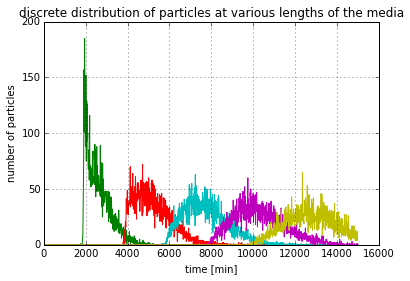

In [8]:
for l in range(0, 120, 20):
    print('At slice L= ',l)
    plt.plot(range(0,15010,10),part.particle_distribution(l,part.time,part.qx).discrete)
plt.grid(1)
plt.xlabel('time [min]')
plt.ylabel('number of particles')
plt.title('discrete distribution of particles at various lengths of the media')
plt.ylim(0,200)

## Temporal Moment Calculation (order = 1)

moment for slice L=  0 0.0
moment for slice L=  20 259926500.0
moment for slice L=  40 517744200.0
moment for slice L=  60 775593400.0
moment for slice L=  80 1031306900.0
moment for slice L=  100 1170428300.0


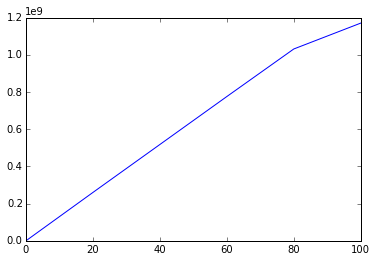

In [9]:
m = []
for i, l in enumerate(range(0,120,20)):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
#     plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    mom = Moments.temporal_moment(1,range(0,15010,10),dis)
    m.append(mom)
    print('moment for slice L= ',l,mom)
plt.plot(range(0,120,20),m)

## Normalized Temporal Moment Calculation (order = 1)

moment for slice L=  0 nan
moment for slice L=  20 2599.265
moment for slice L=  40 5177.442
moment for slice L=  60 7755.934
moment for slice L=  80 10324.4258685
moment for slice L=  100 12657.3840164


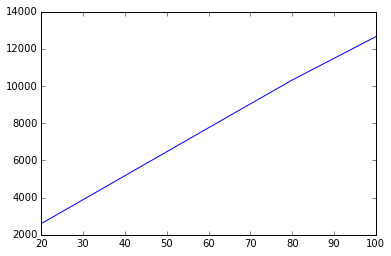

In [10]:
m = []
for i, l in enumerate(range(0,120,20)):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
#     plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    mom = Moments.normalized_temporal_moment(1,range(0,15010,10),dis)
    m.append(mom)
    print('moment for slice L= ',l,mom)
plt.plot(range(0,120,20),m)

### Question: on the above graoh we can see that for L=100mm, the mean residence time is 12657 min ?
i know that the simulation time was 15000 mi

## Temporal Moment Calculation (order = 2)

moment for slice L=  0 0.0
moment for slice L=  20 709603965000.0
moment for slice L=  40 2.75541792e+12
moment for slice L=  60 6.129797126e+12
moment for slice L=  80 1.0798623625e+13
moment for slice L=  100 1.4932950839e+13


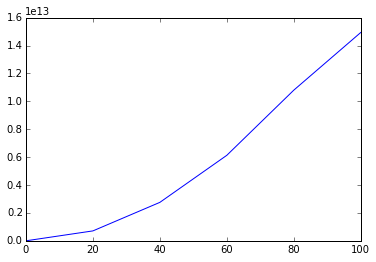

In [11]:
m = []
for i, l in enumerate(range(0,120,20)):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
#     plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    mom = Moments.temporal_moment(2,range(0,15010,10),dis)
    m.append(mom)
    print('moment for slice L= ',l,mom)
plt.plot(range(0,120,20),m)

## Normalized Temporal Moment Calculation (order = 2)

moment for slice L=  0 nan
moment for slice L=  20 7096039.65
moment for slice L=  40 27554179.2
moment for slice L=  60 61297971.26
moment for slice L=  80 108105151.917
moment for slice L=  100 161489681.399


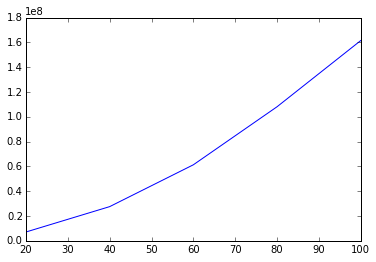

In [13]:
m = []
for i, l in enumerate(range(0,120,20)):
    particle_distribution_df = part.particle_distribution(l,part.time,part.qx)
    dis = particle_distribution_df['discrete'].values
#     dis = dis[dis!=0]
#     plt.scatter(range(dis.shape[0]),dis,color=colors[i])
    mom = Moments.normalized_temporal_moment(2,range(0,15010,10),dis)
    m.append(mom)
    print('moment for slice L= ',l,mom)
plt.plot(range(0,120,20),m)